In [8]:
import collections
import re

## Language model

### Tokenization

In [3]:
lines = ['hom nay toi di hoc', 'hoc xiu da muon ve']

In [5]:
def tokenize(lines, token='word'):  #@save
    """Split text lines into word or character tokens."""
    if token == 'word':
        return [line.split() for line in lines]
    elif token == 'char':
        return [list(line) for line in lines]
    else:
        print('ERROR: unknown token type: ' + token)

tokens = tokenize(lines)
for i in range(2):
    print(tokens[i])

['hom', 'nay', 'toi', 'di', 'hoc']
['hoc', 'xiu', 'da', 'muon', 've']


### Vocabulary

In [9]:
class Vocab:  #@save
    """Vocabulary for text."""
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        if tokens is None:
            tokens = []
        if reserved_tokens is None:
            reserved_tokens = []
        # Sort according to frequencies
        counter = count_corpus(tokens)
        self._token_freqs = sorted(counter.items(), key=lambda x: x[1],
                                   reverse=True)
        # The index for the unknown token is 0
        self.idx_to_token = ['<unk>'] + reserved_tokens
        self.token_to_idx = {token: idx
                             for idx, token in enumerate(self.idx_to_token)}
        for token, freq in self._token_freqs:
            if freq < min_freq:
                break
            if token not in self.token_to_idx:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1

    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]

    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]

    @property
    def unk(self):  # Index for the unknown token
        return 0

    @property
    def token_freqs(self):  # Index for the unknown token
        return self._token_freqs

def count_corpus(tokens):  #@save
    """Count token frequencies."""
    # Here `tokens` is a 1D list or 2D list
    if len(tokens) == 0 or isinstance(tokens[0], list):
        # Flatten a list of token lists into a list of tokens
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)

In [10]:
vocab = Vocab(tokens)
print(list(vocab.token_to_idx.items())[:10])

[('<unk>', 0), ('hoc', 1), ('hom', 2), ('nay', 3), ('toi', 4), ('di', 5), ('xiu', 6), ('da', 7), ('muon', 8), ('ve', 9)]


### n gram

## Back probagation through time from scratch

https://towardsdatascience.com/implementing-backpropagation-with-style-in-python-da4c2f49adb4

In [2]:
import numpy as np
class Network:
    def __init__(self, structure):
        self.structure = structure
        self.num_layers = len(structure) 
        self.Bₙ = [np.random.randn(l, 1) for l in structure[1:]] 
        
        self.Wₙ = [np.random.randn(l, next_l) for l, next_l in zip(structure[:-1], structure[1:])]
        
    def backprop(self, x, y):        
        მJⳆმBₙₛ = [np.zeros(b.shape) for b in self.Bₙ]
        მJⳆმWₙₛ = [np.zeros(W.shape) for W in self.Wₙ]

        Zₙ = [] 
        Aₙ = [] 
        for b, W in zip(self.Bₙ, self.Wₙ):
            z = W.T @ a + b if Zₙ else W.T @ x + b
            a = σ(z)
            Zₙ.append(z)
            Aₙ.append(a)
        
        H = self.num_layers-2
        for L in range(H, -1, -1):
            δ =  σࠤ(Zₙ[L]) * (self.Wₙ[L+1] @ δ) if L != H else ᐁC(Aₙ[L], y) * σࠤ(Zₙ[L])
            მJⳆმBₙₛ[L] = δ
            მJⳆმWₙₛ[L] = Aₙ[L-1] @ δ.T if L != 0 else x @ δ.T
        
        return (მJⳆმBₙₛ, მJⳆმWₙₛ)
    
    def gradient_descent(self, mini_batch, λ):
        მJⳆმBₙ= [np.zeros(b.shape) for b in self.Bₙ]
        მJⳆმWₙ = [np.zeros(W.shape) for W in self.Wₙ]

        for x, y in mini_batch:
            მJⳆმBₙₛ, მJⳆმWₙₛ = self.backprop(x, y)
            მJⳆმBₙ = [მJⳆმb + მJⳆმbₛ for მJⳆმb, მJⳆმbₛ in zip(მJⳆმBₙ, მJⳆმBₙₛ)]  
            მJⳆმWₙ = [მJⳆმW + მJⳆმWₛ for მJⳆმW, მJⳆმWₛ in zip(მJⳆმWₙ, მJⳆმWₙₛ)]

        d = len(mini_batch)
        self.Wₙ = [W - λ/d * მJⳆმW for W, მJⳆმW in zip(self.Wₙ, მJⳆმWₙ)]
        self.Bₙ = [b - λ/d * მJⳆმb for b, მJⳆმb in zip(self.Bₙ, მJⳆმBₙ)]
            
    def train(self, epochs, training_data, λ):
        for j in range(epochs):
            for mini_batch in training_data:
                self.gradient_descent(mini_batch, λ)       
                


def ᐁC(aᴺ, y):    
    return (aᴺ-y)                 #so we can easily change the cost.


def σ(z):
    return 1.0/(1.0+np.exp(-z))


def σࠤ(z):
    return σ(z)*(1-σ(z))


my_net = Network([3, 2 ,2])
print("Initial Weights:")
print(my_net.Wₙ[0])
#the following generates a list of cnt vectors of length dim.
random_vectors = lambda dim, cnt: [np.random.rand(dim, 1) for i in range(cnt)]
random_batch= list(zip(random_vectors(3, 64) , random_vectors(2, 64)))
my_net.gradient_descent(random_batch, 3.0)
print("Optimized Weights:")
print(my_net.Wₙ[0])

Initial Weights:
[[ 1.55773809 -2.68611858]
 [ 0.27580886 -0.24337259]
 [-0.60291941  1.09174272]]
Optimized Weights:
[[ 1.56117725 -2.69185851]
 [ 0.27941327 -0.25232832]
 [-0.59944479  1.08154017]]


## Training RNN

In [32]:
%matplotlib inline
import math
import utils
import torch
import time
import matplotlib.pyplot as plt
from torch import nn
from torch.nn import functional as F

In [6]:
batch_size, num_steps = 32, 35
train_iter, vocab = utils.load_data_time_machine(batch_size, num_steps)

{'time_machine': ('http://d2l-data.s3-accelerate.amazonaws.com/timemachine.txt', '090b5e7e70c295757f55df93cb0a180b9691891a')}


In [7]:
train_random_iter, vocab_random_iter = utils.load_data_time_machine(
    batch_size, num_steps, use_random_iter=True)

{'time_machine': ('http://d2l-data.s3-accelerate.amazonaws.com/timemachine.txt', '090b5e7e70c295757f55df93cb0a180b9691891a')}


In [8]:
def get_params(vocab_size, num_hiddens, device):
    num_inputs = num_outputs = vocab_size

    def normal(shape):
        return torch.randn(size=shape, device=device) * 0.01

    # Hidden layer parameters
    W_xh = normal((num_inputs, num_hiddens))
    W_hh = normal((num_hiddens, num_hiddens))
    b_h = torch.zeros(num_hiddens, device=device)
    # Output layer parameters
    W_hq = normal((num_hiddens, num_outputs))
    b_q = torch.zeros(num_outputs, device=device)
    # Attach gradients
    params = [W_xh, W_hh, b_h, W_hq, b_q]
    for param in params:
        param.requires_grad_(True)
    return params

In [9]:
def init_rnn_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device), )

In [10]:
def rnn(inputs, state, params):
    # Here `inputs` shape: (`num_steps`, `batch_size`, `vocab_size`)
    W_xh, W_hh, b_h, W_hq, b_q = params
    H, = state
    outputs = []
    # Shape of `X`: (`batch_size`, `vocab_size`)
    for X in inputs:
        H = torch.tanh(torch.mm(X, W_xh) + torch.mm(H, W_hh) + b_h)
        Y = torch.mm(H, W_hq) + b_q
        outputs.append(Y)
    return torch.cat(outputs, dim=0), (H,)

In [11]:
class RNNModelScratch: #@save
    """A RNN Model implemented from scratch."""
    def __init__(self, vocab_size, num_hiddens,
                 get_params, init_state, forward_fn, device='cuda:0'):
        self.vocab_size, self.num_hiddens = vocab_size, num_hiddens
        self.params = get_params(vocab_size, num_hiddens, device)
        self.init_state, self.forward_fn = init_state, forward_fn

    def __call__(self, X, state):
        X = F.one_hot(X.T, self.vocab_size).type(torch.float32)
        return self.forward_fn(X, state, self.params)

    def begin_state(self, batch_size, device):
        return self.init_state(batch_size, self.num_hiddens, device)

In [12]:
num_hiddens = 512
X = torch.arange(10).reshape((2, 5))
device = 'cuda' if torch.cuda.is_available() else 'cpu'

net = RNNModelScratch(len(vocab), num_hiddens, get_params,
                      init_rnn_state, rnn)
state = net.begin_state(X.shape[0], device)
Y, new_state = net(X.to(device), state)
Y.shape, len(new_state), new_state[0].shape

(torch.Size([10, 28]), 1, torch.Size([2, 512]))

In [13]:
def predict_ch8(prefix, num_preds, net, vocab, device):  #@save
    """Generate new characters following the `prefix`."""
    state = net.begin_state(batch_size=1, device=device)
    outputs = [vocab[prefix[0]]]
    get_input = lambda: torch.tensor([outputs[-1]], device=device).reshape((1, 1))
    for y in prefix[1:]:  # Warm-up period
        _, state = net(get_input(), state)
        outputs.append(vocab[y])
    for _ in range(num_preds):  # Predict `num_preds` steps
        y, state = net(get_input(), state)
        outputs.append(int(y.argmax(dim=1).reshape(1)))
    return ''.join([vocab.idx_to_token[i] for i in outputs])

In [14]:
predict_ch8('time traveller ', 10, net, vocab, device=device)

'time traveller lbgapujiks'

### Gradient clipping

In [15]:
def grad_clipping(net, theta):  #@save
    """Clip the gradient."""
    if isinstance(net, nn.Module):
        params = [p for p in net.parameters() if p.requires_grad]
    else:
        params = net.params
    norm = torch.sqrt(sum(torch.sum((p.grad ** 2)) for p in params))
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm

### Training

In [48]:
class Accumulator:
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        """Defined in :numref:`sec_softmax_scratch`"""
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]
    
def train_epoch_ch8(net, train_iter, loss, updater, device, use_random_iter):
    """Train a net within one epoch (defined in Chapter 8)."""
    #state, timer = None, d2l.Timer()
    state = None
    tik = time.time()
    #metric = Accumulator(2)
    metric = [0.0] * 2  # Sum of training loss, no. of tokens
    
    for X, Y in train_iter:
        if state is None or use_random_iter:
            # Initialize `state` when either it is the first iteration or
            # using random sampling
            state = net.begin_state(batch_size=X.shape[0], device=device)
        else:
            if isinstance(net, nn.Module) and not isinstance(state, tuple):
                # `state` is a tensor for `nn.GRU`
                state.detach_()
            else:
                # `state` is a tuple of tensors for `nn.LSTM` and
                # for our custom scratch implementation
                for s in state:
                    s.detach_()
        y = Y.T.reshape(-1)
        X, y = X.to(device), y.to(device)
        y_hat, state = net(X, state)
        l = loss(y_hat, y.long()).mean()
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.backward()
            grad_clipping(net, 1)
            updater.step()
        else:
            l.backward()
            grad_clipping(net, 1)
            # Since the `mean` function has been invoked
            updater(batch_size=1)
        #metric.add(l * y.numel(), y.numel())
        #print(metric.data)
        metric = [a + float(b) for a, b in zip(metric, (l * y.numel(), y.numel()))]
        
    return math.exp(metric[0] / metric[1]), metric[1] / (time.time()-tik)

In [49]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent.

    Defined in :numref:`sec_linear_scratch`"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [50]:
#@save
#import torch_lib
def train(net, train_iter, vocab, lr, num_epochs, device,
              use_random_iter=False):
    """Train a model (defined in Chapter 8)."""
    loss = nn.CrossEntropyLoss()
    #animator = torch_lib.Animator(xlabel='epoch', ylabel='perplexity',
    #                        legend=['train'], xlim=[10, num_epochs])
    metric = []
    epochs = []
    # Initialize
    if isinstance(net, nn.Module):
        updater = torch.optim.SGD(net.parameters(), lr)
    else:
        updater = lambda batch_size: sgd(net.params, lr, batch_size)
    predict = lambda prefix: predict_ch8(prefix, 50, net, vocab, device)
    
    # Train and predict
    for epoch in range(num_epochs):
        ppl, speed = train_epoch_ch8(
            net, train_iter, loss, updater, device, use_random_iter)
        if (epoch + 1) % 10 == 0:
            print(predict('time traveller'))
      #      animator.add(epoch + 1, [ppl])
            epochs.append(epoch + 1)
            metric.append(ppl)
            
    print(f'perplexity {ppl:.1f}, {speed:.1f} tokens/sec on {str(device)}')
    print(predict('time traveller'))
    print(predict('traveller'))
    
    fig, axes = plt.subplots()
    axes.plot(epochs, metric)
    plt.show()

time traveller the the the the the the the the the the the the t
time travellere the the the the the the the the the the the the 
time traveller the the the the the the the the the the the the t
time traveller and the the the the the the the the the the the t
time traveller and the the the the the the the the the the the t
time traveller and he the the the the the the the the the the th
time traveller and the the this the the this the the this the th
time traveller and he pare the the the the the the the the the t
time travellere the and he andithe andithe andithe andithe andit
time traveller and the the the the the the the the the the the t
time traveller and the that the that in the this the this the th
time travellere the and and and and and and and and and and and 
time traveller at in than ther dimensions and the time time al v
time traveller and the the that mest the sthe that thes thet the
time traveller thith and ho the and the tide trave it tome tion 
time traveller three dime

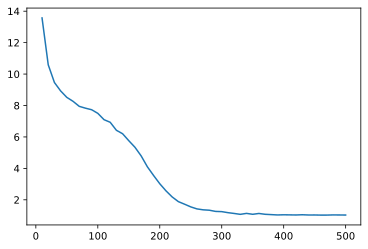

In [51]:
num_epochs, lr = 500, 1
net = RNNModelScratch(len(vocab), num_hiddens, get_params,
                      init_rnn_state, rnn)
train(net, train_iter, vocab, lr, num_epochs, device=device)